In [1]:
# Read uspto dataset
import pandas as pd
import numpy as np
import nltk


df = pd.read_csv('./dataset/AbstractDataset/df-Abstract.csv')
df = df.rename(columns={'No': 'ID', 'Title': 'Title', 'Abstract': 'Abstract', 'Subclass_labels': 'cpc_subclass'})
df_Abstract=df[["ID","Title","Abstract","cpc_subclass"]]
df_Abstract= df_Abstract.dropna()
df_Abstract = df_Abstract.reset_index(drop=True)
df_Abstract.head()

,ID,Title,Abstract,cpc_subclass
0,US07072141,magnetic disc unit with range of gap between d...,a magnetic disc unit having a rotating disc ty...,['G11B']
1,US06981282,systems and methods for transformable suits,methods and systems for transforming a volume ...,['A41D']
2,US06981283,gardening gloves with cushion insert to protec...,a gardening glove or the like designed to prev...,['A41D']
3,US06981284,hockey helmet comprising a lateral adjustment ...,a hockey helmet for receiving a head of a wear...,['A63B']
4,US06981285,toilet and method of operation,a toilet and toilet system suitable for a boat...,['E03D']


In [2]:
df_Abstract_uspto = df_Abstract[df_Abstract['cpc_subclass'].str.contains(r'\bH[\w]*|,[\s]*H[\w]*')]
df_Abstract_uspto.head()

,ID,Title,Abstract,cpc_subclass
19,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L']
20,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']"
57,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S']
58,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K']
59,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K']


In [3]:
len(df_Abstract_uspto)

595466

In [4]:
df_Abstract_uspto["Abstract"]= df_Abstract_uspto["Abstract"].dropna()
df_Abstract_uspto = df_Abstract_uspto.reset_index(drop=True)
df_Abstract_uspto

C:\Users\admin\AppData\Local\Temp/ipykernel_27524/868608903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto["Abstract"]= df_Abstract_uspto["Abstract"].dropna()


,ID,Title,Abstract,cpc_subclass
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L']
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']"
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S']
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K']
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K']
...,...,...,...,...
595461,US08975581,ion trap,an ion trap comprising a first array of magnet...,['H01J']
595462,US08976203,wavelength conversion device and image display...,a wavelength conversion device includes an exc...,"['G09G', 'G03B', 'H01S', 'H04N']"
595463,US08976510,cable assembly and electronic device,an electronic device including an electronic u...,"['H05K', 'H01R']"
595464,US08976819,circuit and method for metering electricity,a current detection module generates a first c...,"['H04J', 'G01R']"


In [5]:
df_Abstract_uspto=df_Abstract_uspto[:60000]
len(df_Abstract_uspto)

60000

# preprocessing

In [6]:
def cleantext(df_Abstract_uspto):
    # Remove unwanted characters like quotes, commas, periods, question marks, etc. from the 'Abstract' column
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['Abstract'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    
    # Convert all text to lowercase
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].str.lower()
    
    # Remove all numbers from the 'cleaned_Abstract_text' column
    df_Abstract_uspto['cleaned_Abstract_text'] =df_Abstract_uspto['cleaned_Abstract_text'].replace(r'\d+', '', regex = True)
        
    # Remove all non-alphanumeric characters from the 'cleaned_Abstract_text' column
    df_Abstract_uspto['cleaned_Abstract_text']  = df_Abstract_uspto['cleaned_Abstract_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    # Remove all punctuation from the 'cleaned_Abstract_text' column
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
    # Remove all URLs from the 'cleaned_Abstract_text' column
    df_Abstract_uspto['cleaned_Abstract_text']  = df_Abstract_uspto['cleaned_Abstract_text'].replace(r'https.*$', "", regex = True)
    
    # Replace multiple spaces with a single space
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].replace("   ", " ", regex = True)
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].replace("  ", " ", regex = True)
   
    return df_Abstract_uspto

# Call the 'cleantext' function on the 'df_Abstract_uspto' dataframe
df_Abstract_uspto = cleantext(df_Abstract_uspto)
df_Abstract_uspto.head()

C:\Users\admin\AppData\Local\Temp/ipykernel_27524/2232787442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['Abstract'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
C:\Users\admin\AppData\Local\Temp/ipykernel_27524/2232787442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].str.lower()
C:\Users\admin\AppData\Local\Temp/ipykernel_2

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...


In [7]:
import nltk
from nltk.corpus import stopwords

# Load the stop words
nltk.download('stopwords')
english_stop_words = set(stopwords.words('english'))

# Define a set of patent-specific stop words
patent_stop_words = set(["invention", "apparatus", "method", "system", "device",
                         "means", "comprising", "having", "including", "wherein",
                         "according", "configured", "configured to", "configured for",
                         "one or more", "plurality", "at least", "said", "and/or",
                         "thereof", "thereto", "herein", "hereby", "hereof", "hereunder",
                         "hereto", "herewith", "respectively", "corresponding",
                         "respectively corresponding", "substantially", "generally",
                         "typically", "usually", "often", "frequently", "commonly",
                         "normally", "conventional", "traditional", "known", "prior",
                         "art", "field", "related", "disclosed", "described", "illustrated",
                         "embodiment", "example", "figure", "graph", "chart", "data",
                         "information", "section", "portion", "aspect", "aspect of",
                         "part", "feature", "detail", "particular", "certain", "some",
                         "many", "various", "multiple", "different", "differentiate",
                         "similar", "corresponding", "correspondingly", "also",
                         "in addition", "furthermore", "moreover", "additionally",
                         "especially", "particular", "particularity", "specific",
                         "specifically", "example", "exemplary", "illustrative",
                         "such as", "include", "includes", "including", "included",
                         "contain", "contains", "containing", "contained", "shown"])

# Merge the sets of stop words
stop_words = english_stop_words.union(patent_stop_words)

df_Abstract_uspto['cleaned_Abstract_text_without_Stopwprd'] = df_Abstract_uspto['cleaned_Abstract_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
df_Abstract_uspto.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\admin\AppData\Local\Temp/ipykernel_27524/2358027427.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto['cleaned_Abstract_text_without_Stopwprd'] = df_Abstract_uspto['cleaned_Abstract_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))


,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...


In [8]:
# import the WordNetLemmatizer class from the nltk library
from nltk.stem import WordNetLemmatizer

# create an instance of the WordNetLemmatizer class
lemmatizer = WordNetLemmatizer()

# define a function to lemmatize words in a text
def lemmatize_words(text):
    # split the text into individual words, lemmatize each word, and join them back together into a string
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

# apply the lemmatize_words function to the cleaned abstract text without stopwords column of the dataframe
df_Abstract_uspto["Lemmatized-Abstract"] = df_Abstract_uspto["cleaned_Abstract_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))

# view the updated dataframe with the new lemmatized abstract column
df_Abstract_uspto.head()

C:\Users\admin\AppData\Local\Temp/ipykernel_27524/1233588646.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto["Lemmatized-Abstract"] = df_Abstract_uspto["cleaned_Abstract_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))


,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...,mounting ic chip circuit board bump formed ele...
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,article footwear sole insole overlying sole in...
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,electrical connector nonrigidly apply force se...
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,flexible bar handler comprises mobile carriage...
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,brush holder incorporates terminal integral co...


In [9]:
#tokenize corpus
nltk.download('punkt')

#tokenize a string into words
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

# Apply the tokenization function to each row of the 'text' column
df_Abstract_uspto['Abstract_tokens'] = df_Abstract_uspto["Lemmatized-Abstract"].apply(tokenize_text)
df_Abstract_uspto.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\admin\AppData\Local\Temp/ipykernel_27524/3692672784.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto['Abstract_tokens'] = df_Abstract_uspto["Lemmatized-Abstract"].apply(tokenize_text)


,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract,Abstract_tokens
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...,mounting ic chip circuit board bump formed ele...,"[mounting, ic, chip, circuit, board, bump, for..."
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,article footwear sole insole overlying sole in...,"[article, footwear, sole, insole, overlying, s..."
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,electrical connector nonrigidly apply force se...,"[electrical, connector, nonrigidly, apply, for..."
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,flexible bar handler comprises mobile carriage...,"[flexible, bar, handler, comprises, mobile, ca..."
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,brush holder incorporates terminal integral co...,"[brush, holder, incorporates, terminal, integr..."


# divide the dataset

In [45]:
#Divide the dataset into different size
df_Abstract_20K=df_Abstract_uspto[:20000]
df_Abstract_20K

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract,Abstract_tokens
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...,mounting ic chip circuit board bump formed ele...,"[mounting, ic, chip, circuit, board, bump, for..."
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,article footwear sole insole overlying sole in...,"[article, footwear, sole, insole, overlying, s..."
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,electrical connector nonrigidly apply force se...,"[electrical, connector, nonrigidly, apply, for..."
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,flexible bar handler comprises mobile carriage...,"[flexible, bar, handler, comprises, mobile, ca..."
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,brush holder incorporates terminal integral co...,"[brush, holder, incorporates, terminal, integr..."
...,...,...,...,...,...,...,...,...
19995,US07050507,adaptive throughput pulse width modulation com...,a signaling apparatus and system may include a...,['H04L'],a signaling apparatus and system may include a...,signaling may transmitter capable sending stro...,signaling may transmitter capable sending stro...,"[signaling, may, transmitter, capable, sending..."
19996,US07050508,method and system for frequency up conversion ...,a method and system is described wherein a sig...,"['H04B', 'H01Q']",a method and system is described wherein a sig...,signal lower frequency converted higher freque...,signal lower frequency converted higher freque...,"[signal, lower, frequency, converted, higher, ..."
19997,US07050509,digital isolation system with hybrid circuit i...,an improved digital capacitive isolation barri...,['H04B'],an improved digital capacitive isolation barri...,improved digital capacitive isolation barrier ...,improved digital capacitive isolation barrier ...,"[improved, digital, capacitive, isolation, bar..."
19998,US07050510,open loop diversity technique for systems empl...,when using four transmit antennas conventional...,"['H04B', 'H04L']",when using four transmit antennas conventional...,using four transmit antennas channel coding em...,using four transmit antenna channel coding emp...,"[using, four, transmit, antenna, channel, codi..."


In [46]:
New_Sample = df_Abstract_uspto.iloc[59394:59395, :]
New_Sample

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract,Abstract_tokens
59394,US07187658,data transmission apparatus selecting efficien...,a data transmission apparatus is provided for ...,"['G06F', 'H04L']",a data transmission apparatus is provided for ...,transmission provided transmitting received us...,transmission provided transmitting received us...,"[transmission, provided, transmitting, receive..."


In [47]:
new_Abstract = str(New_Sample["Lemmatized-Abstract"].iloc[0])
new_Abstract

'transmission provided transmitting received user terminal network destination user terminal executing communication using internet protocol transmission routing table storing relating destination address address network table storing static dynamic network selection unit selecting one network transmission transmits destination based static dynamic transmission enables transmission appropriate network selecting appropriate network based static dynamic network'

# LDA on 20K patent

In [12]:
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# Tokenize the abstracts
docs = [doc.split() for doc in df_Abstract_20K['Lemmatized-Abstract']]

# Apply n-gram (1,3) using the Phrases class from Gensim
bigram_phrases = Phrases(docs, min_count=10)  # bigram model
trigram_phrases = Phrases(bigram_phrases[docs], min_count=10)  # trigram model

#quadgram_phraser = Phrases(trigram_phrases[bigram_phrases[docs]])
#docs = [quadgram_phraser[trigram_phrases[bigram_phrases[doc]]] for doc in docs]

docs = [trigram_phrases[bigram_phrases[doc]] for doc in docs]  # apply the trigram model to the tokenized documents

# Create the dictionary and document-term matrix using the Dictionary class from Gensim
id2word = Dictionary(docs)
id2word.filter_extremes(no_below=10, no_above=0.4)  # remove infrequent and very frequent words from the dictionary
corpus = [id2word.doc2bow(doc) for doc in docs]  # convert the tokenized documents to a bag-of-words corpus

# Train the LDA model using the LdaModel class from Gensim
num_topics = 60  # the number of topics to discover
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=10, random_state=42)

# Transform the corpus to get the topic distribution for each document
lda_output = lda_model[corpus]

# Calculate coherence metrics using the CoherenceModel class from Gensim
cm_cv = CoherenceModel(model=lda_model, corpus=corpus, texts=docs, dictionary=id2word, coherence='c_v')
coherence_cv = cm_cv.get_coherence()  # get the coherence score for the C_v metric

cm_npmi = CoherenceModel(model=lda_model, texts=docs, corpus=corpus, dictionary=id2word, coherence='c_npmi')
coherence_npmi = cm_npmi.get_coherence()  # get the coherence score for the c_npmi metric

cm_umass = CoherenceModel(model=lda_model, corpus=corpus, dictionary=id2word, coherence='u_mass')
coherence_umass = cm_umass.get_coherence()  # get the coherence score for the u_mass metric

# Print the coherence scores
print('C_v coherence:', coherence_cv)
print('c_npmi coherence:', coherence_npmi)
print('u_mass coherence:', coherence_umass)

C_v coherence: 0.4634055941874869
c_npmi coherence: -0.07806451136970982
u_mass coherence: -6.967650406062563


In [13]:
# Print the most significant words for each topic in the model
for topic_num in range(lda_model.num_topics):
    # Get the top 5 words for the current topic
    top_words = lda_model.show_topic(topic_num, topn=10)
    # Join the words into a single string for printing
    word_list = [word for word, _ in top_words]
    topic_words = " ".join(word_list)
    # Print the topic number and its top words
    print(f"Topic #{topic_num}: {topic_words}")

Topic #0: device interface one may operating command modem method standard provide
Topic #1: generator primary fixed movable secondary vertical engine enclosure row column
Topic #2: value object reference difference table correction exposure based calculated predetermined
Topic #3: transmission received error radio based transmitted interference reception base_station estimate
Topic #4: number rate parameter switching pulse period time used threshold vector
Topic #5: electrode film formed semiconductor capacitor wiring surface substrate thin_film metal
Topic #6: pressure waveguide polymer glass linear stress transducer sealing gap vacuum
Topic #7: connector pair cover cavity section outer recess inner formed shield
Topic #8: mode rf band pre single compression coding matching compressed algorithm
Topic #9: switch winding bus host turn stator auxiliary loop connected relay
Topic #10: code bit sequence stream symbol digital port decoding encoded burst
Topic #11: group fuel_cell composite

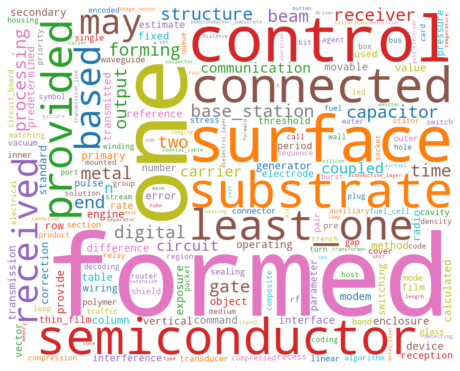

In [43]:
# Create a string of all the topic words
all_topic_words = " ".join([word for topic in lda_model.show_topics(num_topics=60, formatted=False) for word, _ in topic[1]])

# Create a WordCloud object
wordcloud = WordCloud(width=1000, height=800, background_color="white", colormap="tab10").generate(all_topic_words)

# Display the WordCloud image
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


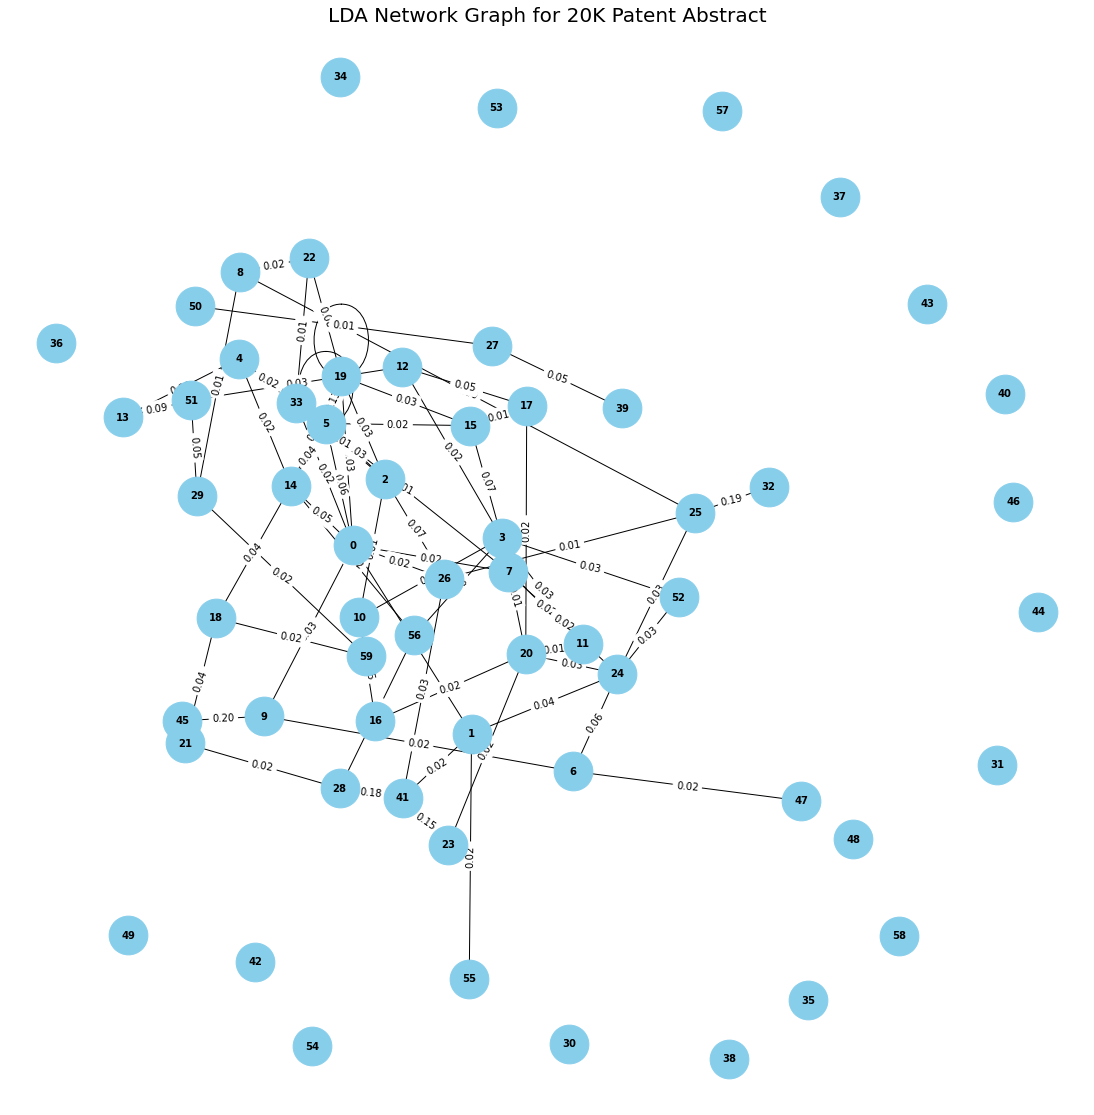

In [77]:
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

# Get all the topic words
all_topic_words = " ".join([word for topic in lda_model.show_topics(num_topics=60, formatted=False) for word, _ in topic[1]])

# Create a list of the most frequent words
most_frequent_words = [word for word, count in Counter(all_topic_words.split()).most_common(30)]

# Create an empty graph object
G = nx.Graph()

# Add the nodes (topics) to the graph
for i in range(60):
    G.add_node(i)

# Add the edges (terms) to the graph
for i in range(60):
    topic_words = lda_model.show_topic(i, topn=10)
    for word, prob in topic_words:
        if word in most_frequent_words:
            j = most_frequent_words.index(word)
            G.add_edge(i, j, weight=prob)

# Draw the graph
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=1500, font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): "{:.2f}".format(d["weight"]) for i, j, d in G.edges(data=True)})
plt.gcf().set_size_inches(15, 15)
plt.title("LDA Network Graph for 20K Patent Abstract",fontsize=20)
plt.show()

In [14]:
#Get the topic and probability for each document

In [15]:
# Get the most probable topic and its probability for each document
doc_topics = [sorted(lda_model.get_document_topics(doc), key=lambda x: x[1], reverse=True) for doc in lda_output]

# Print the most probable topic and its probability for each document
# for i, doc in enumerate(doc_topics):
#     print(f"Document {i+1}:")
#     for topic, prob in doc:
#         print(f"Topic {topic}: {prob:.4f}")
#     print()

In [16]:
# Create empty columns for topic number and probability
df_Abstract_20K['LDA_topics'] = 0
df_Abstract_20K['LDA_prob'] = 0.0

# Loop through each document and update the corresponding row in the dataframe
for i, doc in enumerate(doc_topics):
    topic_num, topic_prob = doc[0]
    df_Abstract_20K.at[i, 'LDA_topics'] = topic_num
    df_Abstract_20K.at[i, 'LDA_prob'] = topic_prob

C:\Users\admin\AppData\Local\Temp/ipykernel_27524/3831316908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_20K['LDA_topics'] = 0
C:\Users\admin\AppData\Local\Temp/ipykernel_27524/3831316908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_20K['LDA_prob'] = 0.0


In [17]:
df_Abstract_20K_topic=df_Abstract_20K[["ID","Title","Abstract","cpc_subclass","Lemmatized-Abstract", "LDA_topics", "LDA_prob"]]
df_Abstract_20K_topic

,ID,Title,Abstract,cpc_subclass,Lemmatized-Abstract,LDA_topics,LDA_prob
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],mounting ic chip circuit board bump formed ele...,24,0.275942
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article footwear sole insole overlying sole in...,26,0.351504
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],electrical connector nonrigidly apply force se...,22,0.217621
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],flexible bar handler comprises mobile carriage...,26,0.471850
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],brush holder incorporates terminal integral co...,24,0.273797
...,...,...,...,...,...,...,...
19995,US07050507,adaptive throughput pulse width modulation com...,a signaling apparatus and system may include a...,['H04L'],signaling may transmitter capable sending stro...,35,0.161265
19996,US07050508,method and system for frequency up conversion ...,a method and system is described wherein a sig...,"['H04B', 'H01Q']",signal lower frequency converted higher freque...,30,0.237242
19997,US07050509,digital isolation system with hybrid circuit i...,an improved digital capacitive isolation barri...,['H04B'],improved digital capacitive isolation barrier ...,35,0.251412
19998,US07050510,open loop diversity technique for systems empl...,when using four transmit antennas conventional...,"['H04B', 'H04L']",using four transmit antenna channel coding emp...,20,0.151686


In [18]:
#prediction

In [48]:
new_Abstract = str(New_Sample["Lemmatized-Abstract"].iloc[0])
new_Abstract

'transmission provided transmitting received user terminal network destination user terminal executing communication using internet protocol transmission routing table storing relating destination address address network table storing static dynamic network selection unit selecting one network transmission transmits destination based static dynamic transmission enables transmission appropriate network selecting appropriate network based static dynamic network'

In [49]:
#query_tokens = quadgram_phraser[trigram_phrases[bigram_phrases[new_Abstract.split()]]]

# Tokenize the new abstract and apply n-gram (1,3)
query_tokens = trigram_phrases[bigram_phrases[new_Abstract.split()]]

# Create a bag of words representation of the query
query_bow = id2word.doc2bow(query_tokens)

# Get the topic distribution for the query using the trained LDA model
query_lda = lda_model[query_bow]

# Print the topic distribution for the query
print(query_lda)

[(3, 0.18039958), (4, 0.19265194), (15, 0.033236515), (43, 0.029620506), (47, 0.04072794), (52, 0.05717741), (57, 0.44851702)]


In [50]:
# Print the most probable topic for the query
most_probable_topic = max(query_lda, key=lambda item: item[1])[0]
print(f"Most probable topic: {most_probable_topic}")

Most probable topic: 57


In [51]:
# Sort the list of topics in descending order based on their weights
sorted_topics = sorted(query_lda, key=lambda item: item[1], reverse=True)

# Select the top 3 topics from the sorted list
top_topics = [topic[0] for topic in sorted_topics[:3]]

# Print the 3 most probable topics
print(f"3 most probable topics: {top_topics}")

3 most probable topics: [57, 4, 3]


In [78]:
# Print the most significant words for the topic
top_words = lda_model.show_topic(3, topn=10)
print(f"Most probable topic for the query: {' '.join(word for word, _ in top_words)}")

Most probable topic for the query: transmission received error radio based transmitted interference reception base_station estimate


In [24]:
# filter the documents that have a predicted topic (for example here predicted topi for query is 3)

In [55]:
filter_topics_lda=df_Abstract_20K_topic[df_Abstract_20K_topic['LDA_topics'] == 3]
filter_topics_lda = filter_topics_lda.sort_values('LDA_prob', ascending=False)
filter_topics_lda = filter_topics_lda.reset_index().rename(columns={'index': 'new_index'})
filter_topics_lda

,new_index,ID,Title,Abstract,cpc_subclass,Lemmatized-Abstract,LDA_topics,LDA_prob
0,6598,US06998346,method for the patterned selective metallizati...,the present invention provides a method for th...,['H01L'],present provides patterned metallization surfa...,3,0.377229
1,2356,US06985650,thermal actuator and an optical waveguide swit...,a thermal actuator comprises a substantially s...,"['G02B', 'H01H']",thermal actuator comprises straight beam beam ...,3,0.369579
2,1072,US07035752,semiconductor test data analysis system,a semiconductor test data analysis system auto...,['H01L'],semiconductor test analysis automatically reco...,3,0.355291
3,1705,US06983380,automatically generating valid behavior specif...,one embodiment of the present invention provid...,"['G06F', 'H04L']",one present provides automatically generates v...,3,0.337993
4,2357,US06985651,thermal actuator with offset beam segment neut...,a thermal actuator comprises a substantially s...,"['G02B', 'H01H']",thermal actuator comprises straight beam beam ...,3,0.304366
...,...,...,...,...,...,...,...,...
99,15172,US07030345,image heating apparatus having a heat generati...,a heating apparatus for heating a material p t...,"['H05B', 'G03G']",heating heating material p heated heat heat ge...,3,0.137305
100,5464,US07099643,analog open loop vco calibration method,an analog open loop voltage controlled oscilla...,['H04B'],analog open loop voltage controlled oscillator...,3,0.131781
101,13790,US07024187,system and method for performing diagnostics o...,there is disclosed a mobile station diagnostic...,['H04Q'],mobile station diagnostic testing use wireless...,3,0.127696
102,17340,US07041971,apparatus and method for detecting chemical ag...,an object of the present invention is to obtai...,['H01J'],object present obtain detection chemical agent...,3,0.123377


In [56]:
#calculate the similarity between the query and document in dataset with the TFIDF embedding

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

docs = filter_topics_lda['Lemmatized-Abstract'].tolist()

# Initialize a TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
doc_vectors = vectorizer.fit_transform(docs)

# Transform the new sample
new_claim_vector = vectorizer.transform([new_Abstract])

# Calculate the cosine similarity between the new sample and the documents
similarity_scores = cosine_similarity(new_claim_vector, doc_vectors)

In [58]:
# Add a new column to the dataframe to store the similarity scores
filter_topics_lda['cosin_similarity_lda'] = similarity_scores[0]
filter_topics_lda

,new_index,ID,Title,Abstract,cpc_subclass,Lemmatized-Abstract,LDA_topics,LDA_prob,cosin_similarity_lda
0,6598,US06998346,method for the patterned selective metallizati...,the present invention provides a method for th...,['H01L'],present provides patterned metallization surfa...,3,0.377229,0.004384
1,2356,US06985650,thermal actuator and an optical waveguide swit...,a thermal actuator comprises a substantially s...,"['G02B', 'H01H']",thermal actuator comprises straight beam beam ...,3,0.369579,0.005584
2,1072,US07035752,semiconductor test data analysis system,a semiconductor test data analysis system auto...,['H01L'],semiconductor test analysis automatically reco...,3,0.355291,0.001018
3,1705,US06983380,automatically generating valid behavior specif...,one embodiment of the present invention provid...,"['G06F', 'H04L']",one present provides automatically generates v...,3,0.337993,0.031097
4,2357,US06985651,thermal actuator with offset beam segment neut...,a thermal actuator comprises a substantially s...,"['G02B', 'H01H']",thermal actuator comprises straight beam beam ...,3,0.304366,0.005332
...,...,...,...,...,...,...,...,...,...
99,15172,US07030345,image heating apparatus having a heat generati...,a heating apparatus for heating a material p t...,"['H05B', 'G03G']",heating heating material p heated heat heat ge...,3,0.137305,0.000000
100,5464,US07099643,analog open loop vco calibration method,an analog open loop voltage controlled oscilla...,['H04B'],analog open loop voltage controlled oscillator...,3,0.131781,0.029945
101,13790,US07024187,system and method for performing diagnostics o...,there is disclosed a mobile station diagnostic...,['H04Q'],mobile station diagnostic testing use wireless...,3,0.127696,0.027351
102,17340,US07041971,apparatus and method for detecting chemical ag...,an object of the present invention is to obtai...,['H01J'],object present obtain detection chemical agent...,3,0.123377,0.000000


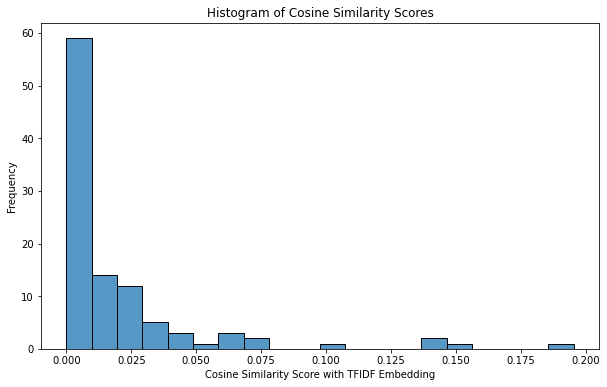

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the cosine similarity scores from the dataframe
cosine_scores = filter_topics_lda['cosin_similarity_lda']

# Plot a histogram of the cosine similarity scores
plt.figure(figsize=(10,6))
sns.histplot(cosine_scores, bins=20)
plt.title('Histogram of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity Score with TFIDF Embedding')
plt.ylabel('Frequency')
plt.show()

In [60]:
# filter_topics_lda = filter_topics_lda.sort_values('cosin_similarity_lda', ascending=False)
# filter_topics_lda = filter_topics_lda.reset_index()
# filter_topics_lda

In [61]:
#calculate the similarity between the query and document in dataset with the Doc2Vec embedding

In [62]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity

# Convert the list of documents to a list of sentences
sentences = [doc.split() for doc in filter_topics_lda['Lemmatized-Abstract'].tolist()]

# Create a list of TaggedDocument objects, where each TaggedDocument represents a single document in the corpus
# The words attribute of each TaggedDocument is set to a list of tokens for the corresponding document
# The tags attribute of each TaggedDocument is set to a list containing a single string, which is the index of the document in the corpus
tagged_data = [TaggedDocument(words=sentences[i], tags=[str(i)]) for i in range(len(sentences))]

# Train a Doc2Vec model on the tagged documents
# The vector_size parameter specifies the dimensionality of the document vectors
# The window parameter specifies the maximum distance between the predicted word and the context words within a sentence
# The min_count parameter specifies the minimum frequency of a word in the corpus to be included in the vocabulary
# The epochs parameter specifies the number of iterations over the corpus during training
model = Doc2Vec(tagged_data, vector_size=100, window=5, min_count=5, epochs=50)

# Infer the document vector for the new claim
# The split() method converts the string to a list of tokens
# The infer_vector() method calculates the document vector using the trained model
new_claim_vector = model.infer_vector(new_Abstract.split())

# Calculate the cosine similarity between the new claim and the documents in the corpus
# The infer_vector() method is called for each document in the corpus to calculate the document vectors
doc_vectors = [model.infer_vector(sentences[i]) for i in range(len(sentences))]
similarity_scores = cosine_similarity([new_claim_vector], doc_vectors)

In [63]:
# Add a new column to the dataframe to store the similarity scores
filter_topics_lda['cosin_similarity_Doc2vec'] = similarity_scores[0]
filter_topics_lda

,new_index,ID,Title,Abstract,cpc_subclass,Lemmatized-Abstract,LDA_topics,LDA_prob,cosin_similarity_lda,cosin_similarity_Doc2vec
0,6598,US06998346,method for the patterned selective metallizati...,the present invention provides a method for th...,['H01L'],present provides patterned metallization surfa...,3,0.377229,0.004384,-0.374047
1,2356,US06985650,thermal actuator and an optical waveguide swit...,a thermal actuator comprises a substantially s...,"['G02B', 'H01H']",thermal actuator comprises straight beam beam ...,3,0.369579,0.005584,0.034443
2,1072,US07035752,semiconductor test data analysis system,a semiconductor test data analysis system auto...,['H01L'],semiconductor test analysis automatically reco...,3,0.355291,0.001018,0.237318
3,1705,US06983380,automatically generating valid behavior specif...,one embodiment of the present invention provid...,"['G06F', 'H04L']",one present provides automatically generates v...,3,0.337993,0.031097,0.578367
4,2357,US06985651,thermal actuator with offset beam segment neut...,a thermal actuator comprises a substantially s...,"['G02B', 'H01H']",thermal actuator comprises straight beam beam ...,3,0.304366,0.005332,0.092557
...,...,...,...,...,...,...,...,...,...,...
99,15172,US07030345,image heating apparatus having a heat generati...,a heating apparatus for heating a material p t...,"['H05B', 'G03G']",heating heating material p heated heat heat ge...,3,0.137305,0.000000,-0.019312
100,5464,US07099643,analog open loop vco calibration method,an analog open loop voltage controlled oscilla...,['H04B'],analog open loop voltage controlled oscillator...,3,0.131781,0.029945,-0.001052
101,13790,US07024187,system and method for performing diagnostics o...,there is disclosed a mobile station diagnostic...,['H04Q'],mobile station diagnostic testing use wireless...,3,0.127696,0.027351,0.549738
102,17340,US07041971,apparatus and method for detecting chemical ag...,an object of the present invention is to obtai...,['H01J'],object present obtain detection chemical agent...,3,0.123377,0.000000,0.180432


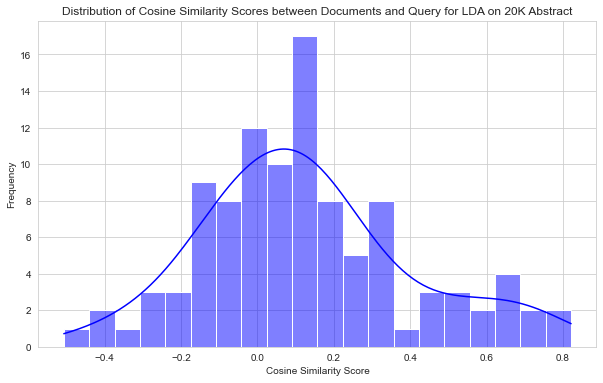

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the cosine similarity scores from the dataframe
cosine_scores = filter_topics_lda['cosin_similarity_Doc2vec']

# Set the style of the plot
sns.set_style("whitegrid")

# Plot a histogram of the cosine similarity scores
plt.figure(figsize=(10,6))
sns.histplot(cosine_scores, bins=20, kde=True, color='blue')

# Set chart title and labels
plt.title('Distribution of Cosine Similarity Scores between Documents and Query for LDA on 20K Abstract')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [65]:
#get the most similar doc in dataset to query

In [66]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_lda = filter_topics_lda.sort_values(by=['cosin_similarity_Doc2vec'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_lda.iloc[0]['Abstract']

most_similar_doc

'the present invention relates to a test set for testing the service of a wireless telephone in a wireless network in embodiments of the present invention the wireless telephone is modular and can be implemented in the test set without hardwiring in embodiments of the present invention the modular wireless telephone is implemented in the test set through the use of a video capturing device and a controller that reads data directly from the display of the modular wireless telephone and deciphers information displayed on the display of the modular wireless telephone'

In [67]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_lda = filter_topics_lda.sort_values(by=['cosin_similarity_Doc2vec'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_lda.iloc[0]['Lemmatized-Abstract']

most_similar_doc

'present relates test set testing service wireless telephone wireless network embodiment present wireless telephone modular implemented test set without hardwiring embodiment present modular wireless telephone implemented test set use video capturing controller read directly display modular wireless telephone deciphers displayed display modular wireless telephone'

In [68]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_lda = filter_topics_lda.sort_values(by=['cosin_similarity_Doc2vec'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_lda.iloc[0]['ID']

most_similar_doc

'US07024161'